In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import soundfile as sf
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from pathlib import Path
from IPython import display
from scipy.signal import hilbert
from matplotlib import pyplot as plt

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [4]:
#Definindo qual o diretorio do dataset.
#Dataset Dustan Baby Languague
DATASET_PATH = 'C:/Users/jhoct/Documents/PROJETOS/data/donateacry-corpus-master'

#Dataset Online
# DATASET_PATH = 'C:/Users/jhoct/Documents/data/train/raw/'
data_dir = pathlib.Path(DATASET_PATH)

In [4]:
# from pydub import AudioSegment

# file_path = DATASET_PATH + '/Eh/Eh_sample_1.wav'

# # Carregar o arquivo de áudio original
# audio = AudioSegment.from_file(file_path)

# # Definir as configurações desejadas para o novo format
# num_channels = 1
# sample_width = 2
# frame_rate = 44100

# # Converter o áudio para o formato desejado
# converted_audio = audio.set_channels(num_channels).set_frame_rate(frame_rate).set_sample_width(sample_width)

# # Salvar o arquivo de áudio convertido
# converted_audio.export("audio.wav", format="wav")
# print("Testes conversor wav", converted_audio)

Testes conversor wav <pydub.audio_segment.AudioSegment object at 0x0000025E78F779D0>


# Dataset com base no Dustan Baby Languague

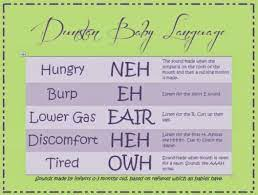

In [198]:
# import os
# import librosa
# import numpy as np
# import tensorflow as tf

# # Carregar o modelo
# modelo = tf.keras.models.load_model('../models')

# # Função para pré-processar o áudio e obter os MFCCs
# def preprocess_audio(audio):
#     spectrogram = tf.signal.stft(audio, frame_length=255, frame_step=128)
#     spectrogram = tf.abs(spectrogram)
#     spectrogram = np.expand_dims(spectrogram, axis=-1)
#     spectrogram = tf.image.resize(spectrogram, [124, 129])
#     return spectrogram

# # Diretório com os arquivos WAV dos choros de bebês
# diretorio_choros = 'C:/Users/jhoct/Documents/audios/'

# # Listar todos os arquivos WAV no diretório
# choros_wav = [arquivo for arquivo in os.listdir(diretorio_choros) if arquivo.lower().endswith('.wav')]

# # Realizar a inferência
# palavras = ['Eairh', 'Eh', 'Heh', 'Neh', 'Owh']


# # Inicializar os contadores
# contador_classes = {palavra: 0 for palavra in palavras}
# contador_total = 0

# # Carregar a função de predição fora da tf.function
# @tf.function
# def predict_fn(input_data):
#     return modelo(input_data)

# for choro_wav in choros_wav:
#     caminho_completo = os.path.join(diretorio_choros, choro_wav)
#     audio, sr = librosa.load(caminho_completo, sr=None)

#     # Pré-processar o áudio e obter os MFCCs
#     mfccs = preprocess_audio(audio)

#     # Adicionar uma dimensão extra para representar o batch (None) no início
#     mfccs = np.expand_dims(mfccs, axis=0)

#     predicao = predict_fn(mfccs)
    
#     if predicao.shape[1] != len(palavras):
#         raise ValueError("O número de classes no modelo não coincide com o número de classes em 'palavras'.")

#     classe_predita = palavras[np.argmax(predicao)]
#     print(f"Arquivo: {choro_wav}, Palavra predita: {classe_predita}")

#     # Atualizar contadores
#     contador_classes[classe_predita] += 1
#     contador_total += 1
    
#     # Criar diretório para a classe predita, caso não exista
#     diretorio_classe = os.path.join(diretorio_choros, classe_predita)
#     if not os.path.exists(diretorio_classe):
#         os.makedirs(diretorio_classe)

#     # Renomear o arquivo de áudio para incluir o nome da classe
#     novo_nome = f"{classe_predita}_sample_{contador_classes[classe_predita]}.wav"
#     novo_caminho = os.path.join(diretorio_classe, novo_nome)
#     os.rename(caminho_completo, novo_caminho)
    
#     # Print da contagem atualizada
#     print("Contagem atual:")
#     for palavra, contador in contador_classes.items():
#         print(f"{palavra}: {contador}")

# # Imprimir os resultados
# print("\nContagem de amostras por classe:")
# for palavra, contador in contador_classes.items():
#     print(f"{palavra}: {contador}")

# print(f"\nTotal de amostras processadas: {contador_total}")


# Lista de tipos de choros dentro do dataset
Essa lista é baseada no nome das pastas que separam os choros de bebês em categorias.

In [5]:
commands = np.array([file for file in tf.io.gfile.listdir(str(data_dir)) if file != 'README.md'])
print('Tipos de Choros:', commands)

Tipos de Choros: ['awake' 'belly_pain' 'burping' 'diaper' 'discomfort' 'hungry' 'outros'
 'sleepy' 'tired']


# Exibindo a quantidade total de choros e a quantidade de choros por categoria.

In [8]:
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
filenames = tf.random.shuffle(filenames)
num_samples = len(filenames)
print('Número total de exemplos:',num_samples)
print('Número de exemplos', commands[0], ':',
      len(tf.io.gfile.listdir(str(data_dir/commands[0]))))
print('Número de exemplos', commands[1], ':',
      len(tf.io.gfile.listdir(str(data_dir/commands[1]))))
print('Número de exemplos', commands[2], ':',
      len(tf.io.gfile.listdir(str(data_dir/commands[2]))))
print('Número de exemplos', commands[3], ':',
      len(tf.io.gfile.listdir(str(data_dir/commands[3]))))
print('Número de exemplos', commands[4], ':',
      len(tf.io.gfile.listdir(str(data_dir/commands[4]))))
print('Número de exemplos', commands[5], ':',
      len(tf.io.gfile.listdir(str(data_dir/commands[5]))))
print('Número de exemplos', commands[6], ':',
      len(tf.io.gfile.listdir(str(data_dir/commands[6]))))
print('Número de exemplos', commands[7], ':',
      len(tf.io.gfile.listdir(str(data_dir/commands[7]))))
print('Número de exemplos', commands[8], ':',
      len(tf.io.gfile.listdir(str(data_dir/commands[8]))))


Número total de exemplos: 3215
Número de exemplos awake : 160
Número de exemplos belly_pain : 16
Número de exemplos burping : 8
Número de exemplos diaper : 134
Número de exemplos discomfort : 187
Número de exemplos hungry : 542
Número de exemplos outros : 2000
Número de exemplos sleepy : 144
Número de exemplos tired : 24


# Definindo a quantidade de choros que serão usados para treinamento, validação e teste.

Dataset Dustan Baby Languague

In [201]:
# x_train = filenames[:1375]
# x_val = filenames[1100: 1100 + 137]
# x_test = filenames[1237: 1237 + 137]
# print('Tamanho do conjunto de treinamento: ', len(x_train))
# print('Tamanho do conjunto de validação: ', len(x_val))
# print('Tamanho do conjunto de teste: ', len(x_test))

Dataset encontrado Online

In [202]:
# x_train = filenames[:1167]
# x_val = filenames[934: 934 + 116]
# x_test = filenames[1050: 1050 + 116]
# print('Tamanho do conjunto de treinamento: ', len(x_train))
# print('Tamanho do conjunto de validação: ', len(x_val))
# print('Tamanho do conjunto de teste: ', len(x_test))

Tamanho do conjunto de treinamento:  1167
Tamanho do conjunto de validação:  116
Tamanho do conjunto de teste:  116


Conjunto com outros tipos de audios

In [9]:
x_train = filenames[:2893]
x_val = filenames[2893: 2893 + 161]
x_test = filenames[3053: 3053 + 161]
print('Tamanho do conjunto de treinamento: ', len(x_train))
print('Tamanho do conjunto de validação: ', len(x_val))
print('Tamanho do conjunto de teste: ', len(x_test))

Tamanho do conjunto de treinamento:  2893
Tamanho do conjunto de validação:  161
Tamanho do conjunto de teste:  161


Ler um arquivo de áudio usando tf.io.read_file para obter o conteúdo do arquivo como dados binários. Em seguida, tf.audio.decode_wav é usado para decodificar o arquivo de áudio em um tensor test_audio do tipo float32, representando a forma de onda do áudio.

In [5]:
# import tensorflow as tf

# # Caminho para o arquivo WAV
# file_path = DATASET_PATH + '/Eh/Eh_sample_1.wav'
# # file_path = 'C:/Users/jhoct/Documents/PROJETOS/ProjetoWhyCry20/app/audio.wav'


# # Ler o conteúdo do arquivo WAV
# audio_content = tf.io.read_file(file_path)

# # Decodificar o conteúdo do arquivo WAV
# audio_data, sample_rate = tf.audio.decode_wav(audio_content)

# # O resultado, "audio_data", será um tensor que contém os dados de áudio decodificados,
# # e "sample_rate" será um tensor com a taxa de amostragem do áudio.

# print(audio_data)

# print(sample_rate)

tf.Tensor(
[[-4.0588379e-02]
 [-4.7729492e-02]
 [-4.7119141e-02]
 ...
 [ 6.1035156e-05]
 [-2.1362305e-04]
 [ 3.6621094e-04]], shape=(745472, 1), dtype=float32)
tf.Tensor(44100, shape=(), dtype=int32)


In [9]:
# import wave
# import soundfile

# def get_wav_header(file_path):
#     try:
#         with wave.open(file_path, 'rb') as wav_file:
#             # Obter informações do cabeçalho
#             num_channels = wav_file.getnchannels()
#             sample_width = wav_file.getsampwidth()
#             frame_rate = wav_file.getframerate()
#             num_frames = wav_file.getnframes()
#             compression_type = wav_file.getcomptype()
#             compression_name = wav_file.getcompname()

#             # Retorna um dicionário com as informações do cabeçalho
#             header_info = {
#                 'num_channels': num_channels,
#                 'sample_width': sample_width,
#                 'frame_rate': frame_rate,
#                 'num_frames': num_frames,
#                 'compression_type': compression_type,
#                 'compression_name': compression_name
#             }

#             return header_info
#     except Exception as e:
#         print("Erro ao ler o cabeçalho do arquivo:", str(e))
#         return None

# # Exemplo de uso:
# file_path = 'C:/Users/jhoct/Documents/PROJETOS/ProjetoWhyCry20/app/audio.wav'

# # Read and rewrite the file with soundfile
# # data, samplerate = soundfile.read(file_path)
# # soundfile.write(file_path, data, samplerate)

# # # Now try to open the file with wave
# # with wave.open(file_path) as file:
# #     print('File opened!')

# file_path = DATASET_PATH + '/Eh/Eh_sample_1.wav'
# header_info = get_wav_header(file_path)
# if header_info:
#     print("Informações do cabeçalho:")
#     print(header_info)
# else:
#     print("Falha ao obter informações do cabeçalho.")


Informações do cabeçalho:
{'num_channels': 1, 'sample_width': 2, 'frame_rate': 44100, 'num_frames': 745472, 'compression_type': 'NONE', 'compression_name': 'not compressed'}


# Intensidade, tonalidade, tom e pitch do choro

In [3]:
# import tensorflow as tf

# # Caminho para o arquivo WAV
# file_path = DATASET_PATH + '/Eh/Eh_sample_1.wav'

# # Ler o conteúdo do arquivo WAV
# audio_content = tf.io.read_file(file_path)

# # Decodificar o conteúdo do arquivo WAV
# audio_data, sample_rate = tf.audio.decode_wav(audio_content)

# # Calcular a intensidade (média do valor absoluto do áudio)
# intensidade = tf.reduce_mean(tf.abs(audio_data))

# # Calcular a tonalidade (média do valor RMS do áudio)
# tonalidade = tf.sqrt(tf.reduce_mean(tf.square(audio_data)))

# print("Intensidade:", intensidade.numpy())
# print("Tonalidade:", tonalidade.numpy())

# # Calcular a média da intensidade e tonalidade
# media_intensidade_tonalidade = (intensidade + tonalidade) / 2
# print("Média da intensidade e tonalidade:", media_intensidade_tonalidade.numpy())


Intensidade: 0.034286
Tonalidade: 0.051534183
Média da intensidade e tonalidade: 0.04291009


# Duracao do audio

In [6]:
import tensorflow as tf
import librosa

# Caminho para o arquivo WAV
file_path = DATASET_PATH + '/Eh/Eh_sample_1.wav'

# Ler o conteúdo do arquivo WAV usando o TensorFlow
audio_content = tf.io.read_file(file_path)

# Decodificar o conteúdo do arquivo WAV usando o TensorFlow
audio_data, sr = tf.audio.decode_wav(audio_content)

# Calcular a duração em segundos usando operações tensoriais do TensorFlow
duracao_segundos = tf.cast(tf.shape(audio_data)[0], tf.float32) / tf.cast(sr, tf.float32)

# Formatar a saída
duracao_formatada = f"{duracao_segundos.numpy():.1f} Segundos"

print(duracao_formatada)

16.9 Segundos


# Spectograma de um audio unico

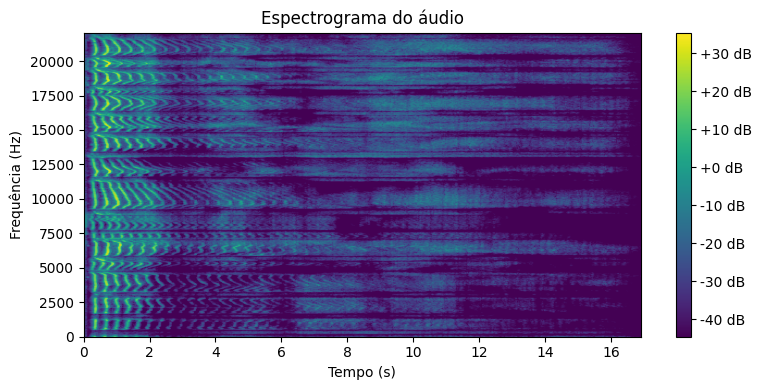

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import librosa

# Carregar o áudio
audio, sr = librosa.load(DATASET_PATH + '/Eh/Eh_sample_1.wav', sr=None)

# Converter o áudio para um tensor TensorFlow
audio_tensor = tf.convert_to_tensor(audio)

# Calcular o espectrograma do áudio usando operações tensoriais do TensorFlow
spectrogram = tf.abs(tf.signal.stft(audio_tensor, frame_length=1024, frame_step=512))
spectrogram = tf.abs(spectrogram)

# Converter o espectrograma para um array NumPy
spectrogram_np = spectrogram.numpy()

# Plotar o espectrograma
plt.figure(figsize=(8, 4))
plt.imshow(librosa.amplitude_to_db(spectrogram_np), cmap='viridis', origin='lower', aspect='auto', extent=[0, len(audio)/sr, 0, sr/2])
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma do áudio')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.tight_layout()
plt.show()


# Verificar se há choro contínuo ou intermitente

In [8]:
import tensorflow as tf
import librosa
import numpy as np
from scipy.signal import hilbert as analytic_signal

# Helper function to compute analytic_signal using scipy and convert to TensorFlow tensor
def tf_analytic_signal(audio):
    amplitude_envelope = np.abs(analytic_signal(audio))
    return tf.convert_to_tensor(amplitude_envelope, dtype=tf.float32)

# Carregar o áudio
audio, sr = librosa.load(DATASET_PATH + '/Eh/Eh_sample_1.wav')

# Converter o áudio para um tensor TensorFlow
audio_tensor = tf.convert_to_tensor(audio, dtype=tf.float32)

# Calcular o envelope de amplitude do áudio usando tf.py_function
amplitude_envelope_tensor = tf.py_function(func=tf_analytic_signal, inp=[audio_tensor], Tout=tf.float32)

# Definir um limiar para identificar trechos de choro
limiar = tf.reduce_mean(amplitude_envelope_tensor) * 1.5

# Encontrar os índices onde a amplitude está acima do limiar
indices_choro = tf.where(amplitude_envelope_tensor > limiar)[:, 0]

# Calcular as diferenças entre os índices para identificar pausas e variações no ritmo
diferenca_indices = tf.boolean_mask(indices_choro[1:] - indices_choro[:-1], indices_choro[1:] != indices_choro[:-1])

# Verificar se há pausas regulares ou variações no ritmo
pausas_regulares = tf.reduce_all(diferenca_indices == diferenca_indices[0])
variacoes_ritmo = tf.math.logical_not(tf.reduce_all(diferenca_indices == diferenca_indices[0]))

# Verificar se há choro contínuo ou intermitente
if len(indices_choro) > 0:
    if pausas_regulares:
        padrao = "Choro com pausas regulares"
    elif variacoes_ritmo:
        padrao = "Choro com variações no ritmo"
    else:
        padrao = "Choro contínuo"
else:
    padrao = "Sem choro detectado"

print(padrao)


Choro com variações no ritmo


##### Função que pré-processa os arquivos de áudio WAV brutos do conjunto de dados em tensores de áudio:

In [209]:
# def decode_audio(audio_binary):
#   # Decode WAV-encoded audio files to `float32` tensors, normalized
#   # to the [-1.0, 1.0] range. Return `float32` audio and a sample rate.
#   audio, _ = tf.audio.decode_wav(contents=audio_binary)
#   # Since all the data is single channel (mono), drop the `channels`
#   # axis from the array.
#   return tf.squeeze(audio, axis=-1)

# Função que cria rótulos usando os diretórios pai para cada arquivo

In [10]:
def get_label(file_path):
  retorno = tf.strings.split(file_path, os.path.sep)[-2]
  return retorno

# Função que pré-processa os arquivos de áudio WAV brutos do conjunto de dados em tensores de áudio:
#### Função auxiliar — get_waveform_and_label— que coloca tudo junto:

In [11]:
def get_waveform_and_label(file_path):
  label = get_label(file_path)
  waveform = tf.io.read_file(file_path)
  waveform = tf.audio.decode_wav(waveform, desired_channels=1)
  retorno = waveform.audio[:, 0], label
  return retorno

# Criando o conjunto de treinamento para extrair os pares de rótulo de áudio:
Criamos um dataset de formas de ondas com a função anterior.

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

files_ds_x_train = tf.data.Dataset.from_tensor_slices(x_train)
print("files_ds_x_train: ",files_ds_x_train)

waveform_ds_x_train = files_ds_x_train.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)
print("waveform_ds_x_train: ", waveform_ds_x_train)

files_ds_x_train:  <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
waveform_ds_x_train:  <_ParallelMapDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


# Traçando algumas formas de onda de áudio:

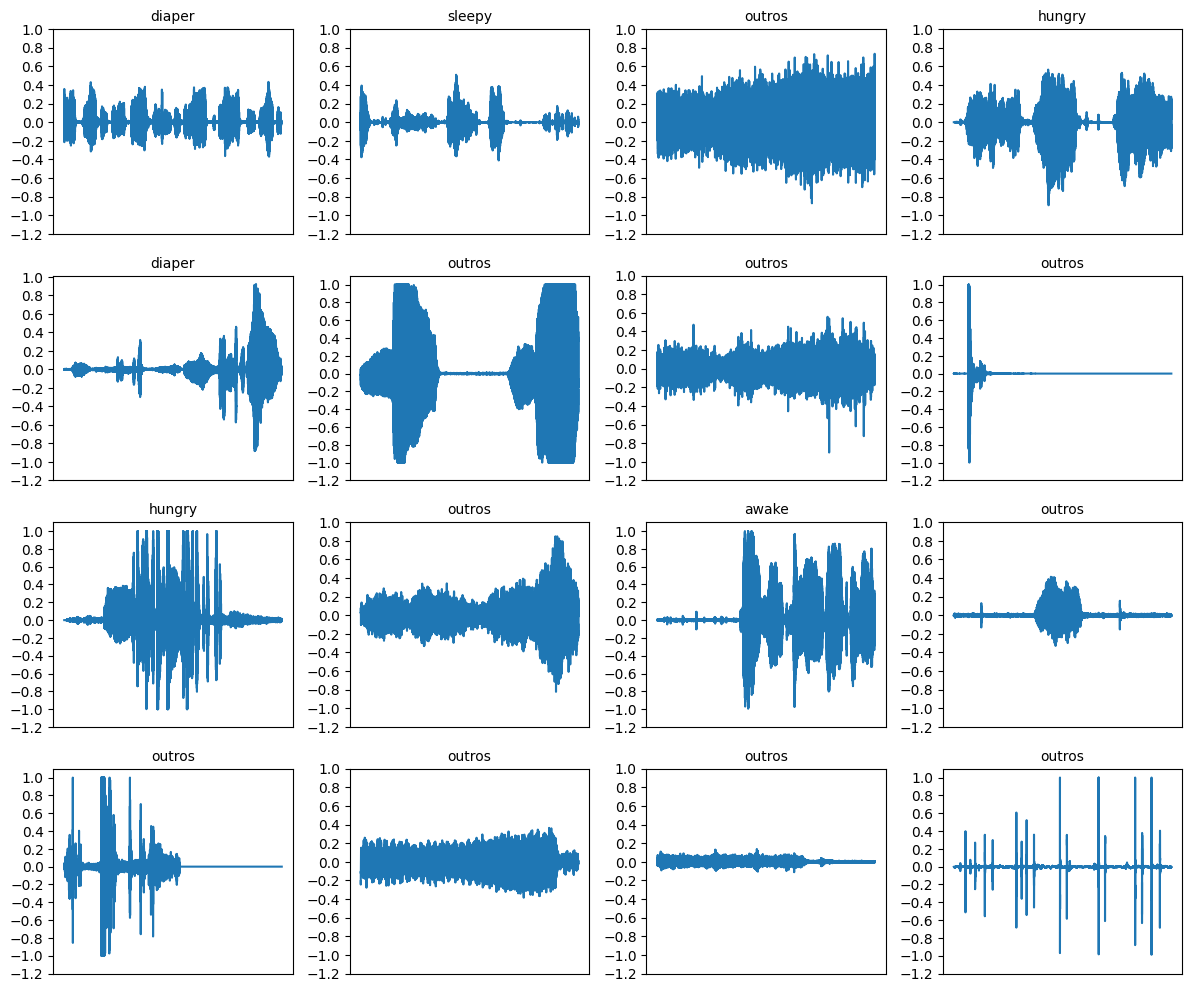

In [13]:
import numpy as np
import matplotlib.pyplot as plt

rows = 4
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(12, 10))

for i, (audio, label) in enumerate(waveform_ds_x_train.take(rows * cols)):
    r, c = divmod(i, cols)
    ax = axes[r][c]
    ax.plot(audio.numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    ax.set_xticks([])  # Remover os ticks no eixo X
    label = label.numpy().decode('utf-8')
    ax.set_title(label, fontsize=10)  # Ajustar o tamanho da fonte para melhor encaixe

plt.tight_layout(pad=1.0)  # Reduzir o espaçamento entre subplots
plt.show()


# Função utilitária para converter formas de onda em espectrogramas:

In [14]:
def get_spectrogram(waveform):
  input_len = 16000
  waveform = waveform[:input_len]
  zero_padding = tf.zeros([16000 - tf.shape(waveform)[0]], dtype=tf.float32)
  waveform = tf.cast(waveform, dtype=tf.float32)
  equal_length = tf.concat([waveform, zero_padding], 0)
  spectrogram = tf.signal.stft(equal_length, frame_length=255, frame_step=128)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, -1)
  return spectrogram

# E xplorando os dados. Imprimindo as formas de onda tensorizada de um exemplo e o espectrograma correspondente e reproduzindo o áudio original:


In [15]:
waveform, label = next(iter(waveform_ds_x_train))
label = label.numpy().decode('utf-8')
spectrogram = get_spectrogram(waveform)

print('Label:', label)
print('Waveform shape:', waveform.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Audio playback')
display.Audio(waveform, rate=16000)


Label: diaper
Waveform shape: (283644,)
Spectrogram shape: (124, 129, 1)
Audio playback


# Função para exibir um espectrograma:

In [16]:
def plot_spectrogram(spectrogram, ax):
    spectrogram = np.squeeze(spectrogram)
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    ax.imshow(log_spec, aspect='auto', origin='lower', cmap='inferno')

# Forma de onda do exemplo ao longo do tempo e o espectrograma correspondente


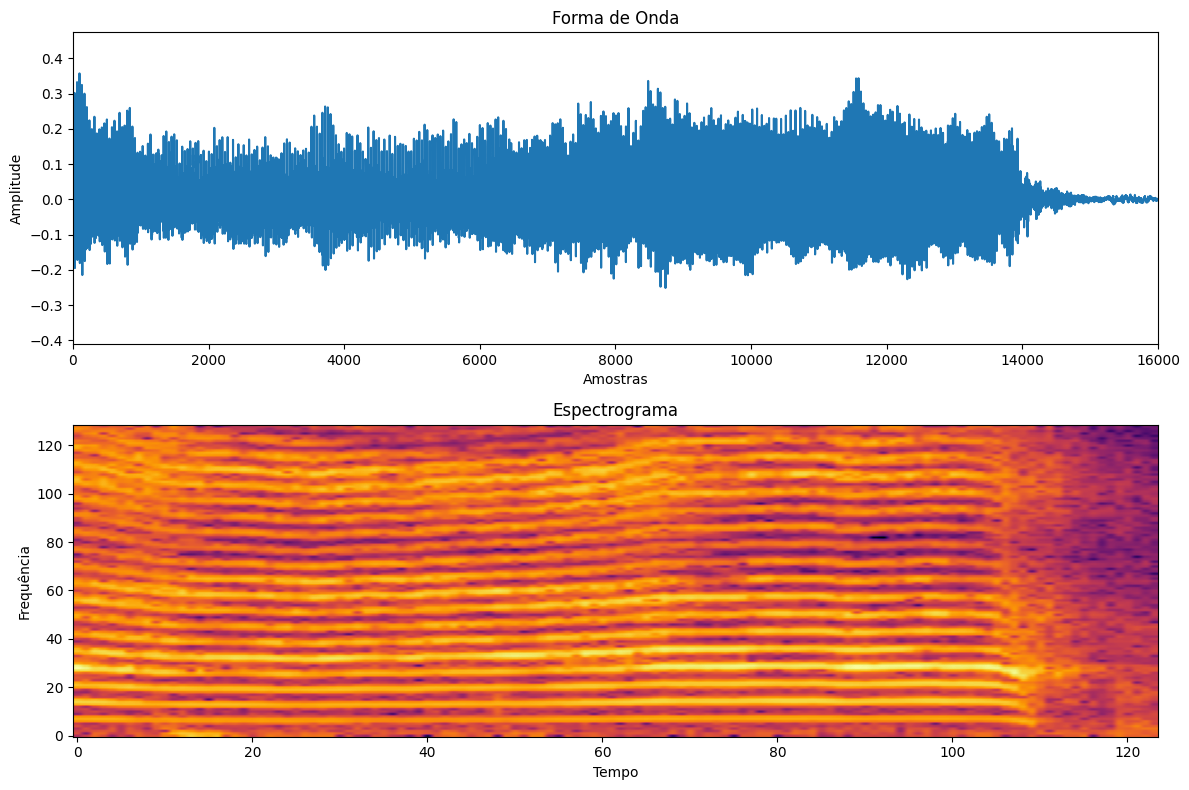

In [17]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])

axes[0].plot(timescale, waveform)
axes[0].set_title('Forma de Onda')
axes[0].set_xlim([0, 16000])
axes[0].set_xlabel('Amostras')
axes[0].set_ylabel('Amplitude')

plot_spectrogram(spectrogram, axes[1])
axes[1].set_title('Espectrograma')
axes[1].set_xlabel('Tempo')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


# Função que transforma o conjunto de dados da forma de onda em espectrogramas e seus rótulos correspondentes como IDs inteiros:

In [18]:
def get_spectrogram_and_label_id(audio, label):
  spectrogram = get_spectrogram(audio)
  label_id = tf.argmax(label == commands)
  return spectrogram, label_id

# Mapeando get_spectrogram_and_label_id os elementos do conjunto de dados com Dataset.map:

In [19]:
spectrogram_ds = waveform_ds_x_train.map(
    map_func=get_spectrogram_and_label_id,
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

# Examinando os espectrogramas para diferentes exemplos do conjunto de dados:

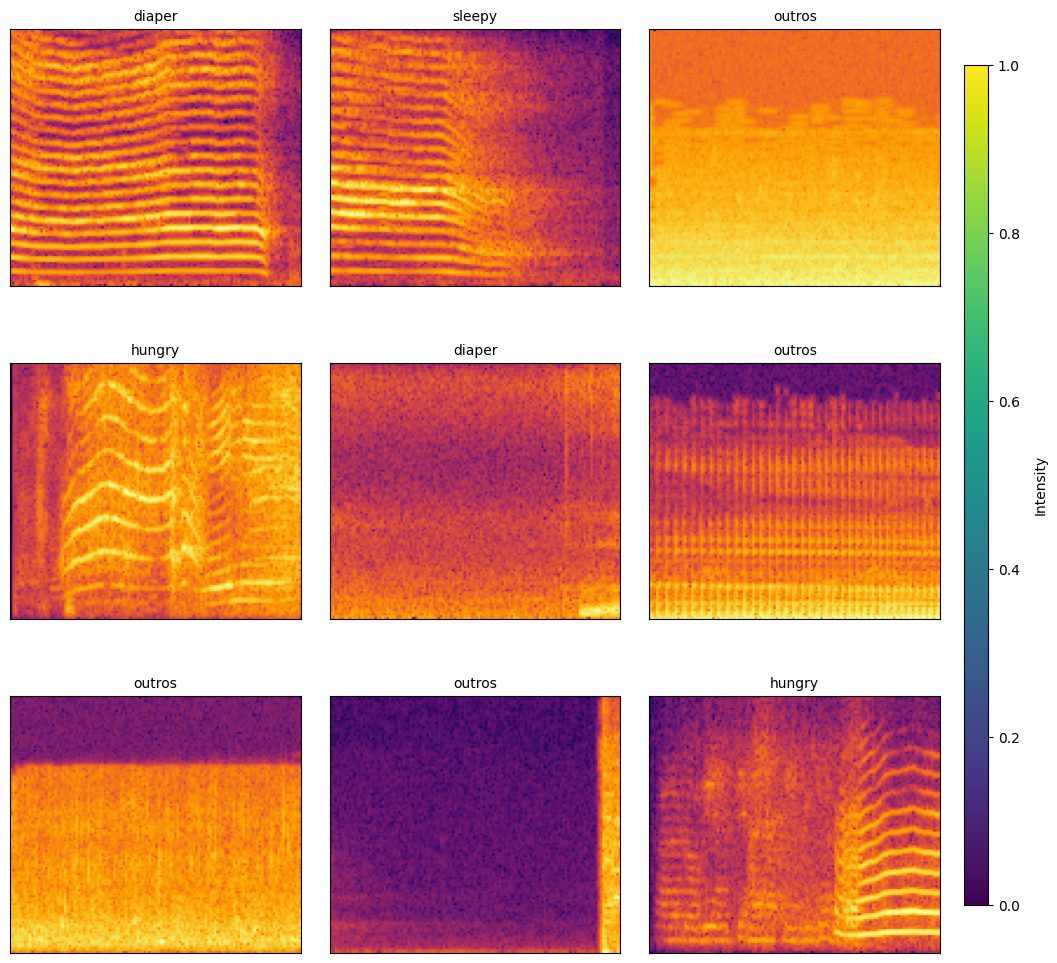

In [20]:
import matplotlib.pyplot as plt
import numpy as np

rows = 3
cols = 3
n = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

# Adicionar uma cor de fundo para as áreas vazias
fig.set_facecolor('white')

# Configurações gerais para os títulos
title_fontsize = 10

# Configuração da barra de cores compartilhada
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Posição da barra de cores
norm = plt.Normalize(vmin=0, vmax=1)  # Normalização dos valores de cores
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.viridis), cax=cax)
cbar.set_label('Intensity', labelpad=10)

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
    ax = axes[i // cols, i % cols]
    plot_spectrogram(spectrogram.numpy(), ax)
    ax.set_title(commands[label_id.numpy()], fontsize=title_fontsize)
    
    # Remover títulos dos eixos x e y
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Ajustar espaçamento entre subplots
plt.show()


# Construir e treinar o modelo

#### Pré-processamento do conjunto de treinamento, validação e teste:

In [21]:
def preprocess_dataset(files):
    files_ds = tf.data.Dataset.from_tensor_slices(files)
    output_ds = files_ds.map(
        map_func=get_waveform_and_label,
        num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    output_ds = output_ds.map(
        map_func=get_spectrogram_and_label_id,
        num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    return output_ds

In [22]:
x_train_ds = preprocess_dataset(x_train)
x_val_ds = preprocess_dataset(x_val)
x_test_ds = preprocess_dataset(x_test)
print(x_train_ds)
print(x_val_ds)
print(x_test_ds)

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [23]:
# Agrupando os conjuntos de treinamento e validação para treinamento de modelo:
batch_size = 64

x_train_ds = x_train_ds.batch(batch_size)
x_val_ds = x_val_ds.batch(batch_size)
print(x_train_ds)
print(x_val_ds)

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [24]:
# Adicionando Dataset.cachee Dataset.prefetch operações para reduzir a latência de leitura durante o treinamento do modelo:

x_train_ds = x_train_ds.cache().prefetch(AUTOTUNE)
x_val_ds = x_val_ds.cache().prefetch(AUTOTUNE)
print(x_train_ds)
print(x_val_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


Para o modelo, usararemos uma rede neural convolucional simples (CNN), pois transformou os arquivos de áudio em imagens de espectrograma.

O tf.keras.Sequential modelo usará as seguintes camadas de pré-processamento Keras:

tf.keras.layers.Resizing: para reduzir a amostra da entrada e permitir que o modelo treine mais rápido.

tf.keras.layers.Normalization: para normalizar cada pixel na imagem com base em sua média e desvio padrão.



In [25]:
for spectrogram, _ in spectrogram_ds.take(1):
  input_shape = spectrogram.shape
  print('Input shape:', input_shape)
  
  
num_labels = len(commands)

# Instanciar a camada `tf.keras.layers.Normalization`.
norm_layer = layers.Normalization()
# Ajustar o estado da camada aos espectrogramas
# com `Normalization.adapt`.
norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (124, 129, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizati  (None, 32, 32, 1)         3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           

Use sparse_categorical_crossentropy para problemas de classificação com várias classes (3 ou mais classes) e os rótulos verdadeiros são representados por inteiros.
Use binary_crossentropy para problemas de classificação binária (2 classes) ou problemas onde você precisa fazer uma classificação binária com a estratégia de one-hot encoding nos rótulos verdadeiros.

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

# Treinando o modelo

In [27]:
EPOCHS = 20
early_stopping = tf.keras.callbacks.EarlyStopping(verbose=1, patience=2)

history = model.fit(
    x_train_ds,
    validation_data=x_val_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping],
)


Epoch 1/20
46/46 [==============================] - 8s 164ms/step - loss: 1.1966 - accuracy: 0.6592 - val_loss: 1.0085 - val_accuracy: 0.7329
Epoch 2/20
46/46 [==============================] - 4s 88ms/step - loss: 1.0158 - accuracy: 0.7003 - val_loss: 0.9478 - val_accuracy: 0.7267
Epoch 3/20
46/46 [==============================] - 4s 82ms/step - loss: 0.9506 - accuracy: 0.7134 - val_loss: 0.9263 - val_accuracy: 0.7391
Epoch 4/20
46/46 [==============================] - 4s 82ms/step - loss: 0.9009 - accuracy: 0.7242 - val_loss: 0.9850 - val_accuracy: 0.7143
Epoch 5/20
46/46 [==============================] - 4s 82ms/step - loss: 0.8549 - accuracy: 0.7363 - val_loss: 0.8984 - val_accuracy: 0.7143
Epoch 6/20
46/46 [==============================] - 4s 83ms/step - loss: 0.7863 - accuracy: 0.7508 - val_loss: 0.9072 - val_accuracy: 0.7329
Epoch 7/20
46/46 [==============================] - 4s 85ms/step - loss: 0.7418 - accuracy: 0.7639 - val_loss: 0.8750 - val_accuracy: 0.7329
Epoch 8/20
4

##### Plotando as curvas de perda de treinamento e validação para verificar como o modelo melhorou durante o treinamento:

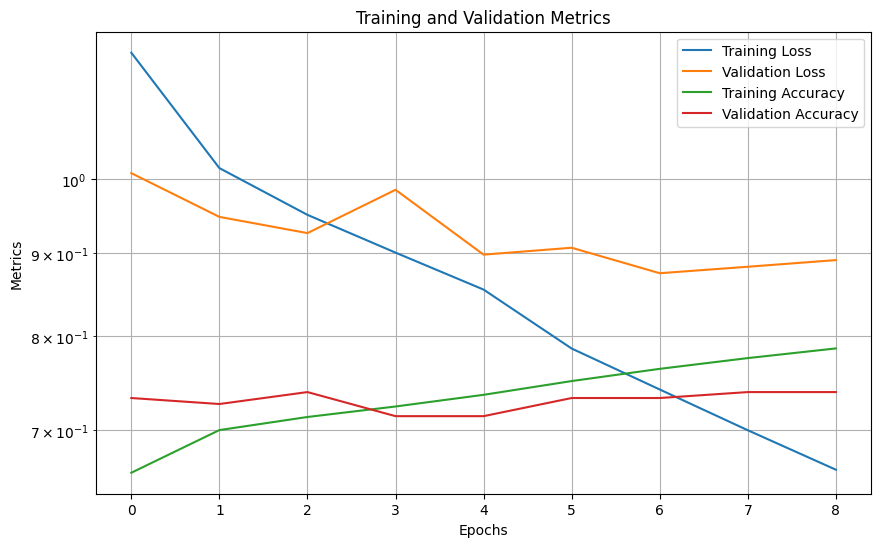

In [28]:
# Obter métricas
metrics = history.history
loss = metrics['loss']
val_loss = metrics['val_loss']
accuracy = metrics['accuracy']
val_accuracy = metrics['val_accuracy']

# Plotar gráfico de perda
plt.figure(figsize=(10, 6))
plt.plot(history.epoch, loss, label='Training Loss')
plt.plot(history.epoch, val_loss, label='Validation Loss')

# Plotar gráfico de acurácia
plt.plot(history.epoch, accuracy, label='Training Accuracy')
plt.plot(history.epoch, val_accuracy, label='Validation Accuracy')

# Configurar título e rótulos dos eixos
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')

# Utilizar escala logarítmica no eixo y
plt.yscale('log')

# Adicionar grade ao gráfico
plt.grid(True, which='both')

# Exibir legenda
plt.legend()

plt.show()

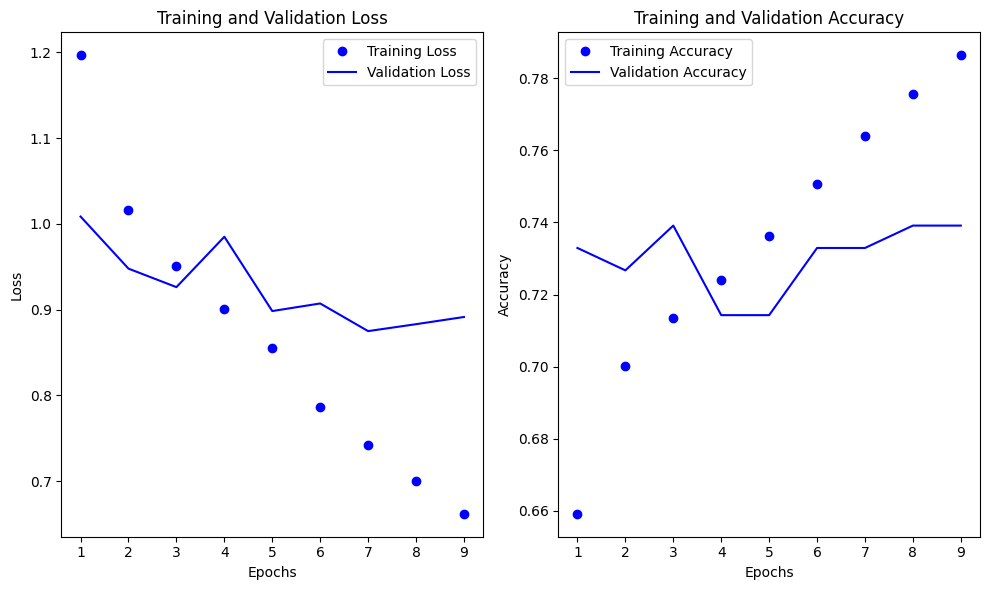

In [29]:
# Obter métricas
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plotar gráfico de perda e acurácia
plt.figure(figsize=(10, 6))

# Gráfico de perda
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfico de acurácia
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


##### Plotando as curvas de perda de treinamento e validação para verificar como o modelo melhorou durante o treinamento:


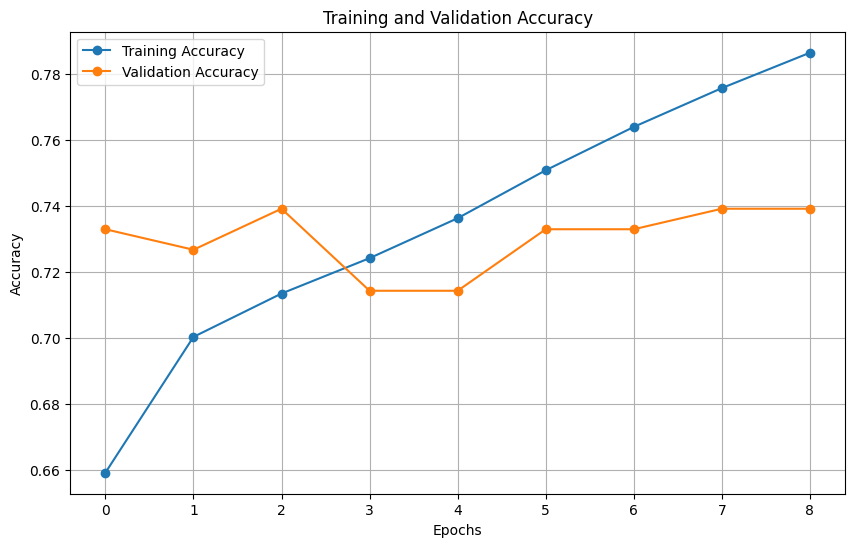

In [30]:
# Obter métricas
metrics = history.history
accuracy = metrics['accuracy']
val_accuracy = metrics['val_accuracy']

# Plotar gráfico de acurácia
plt.figure(figsize=(10, 6))
plt.plot(history.epoch, accuracy, marker='o', label='Training Accuracy')
plt.plot(history.epoch, val_accuracy, marker='o', label='Validation Accuracy')

# Configurar título e rótulos dos eixos
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adicionar grade ao gráfico
plt.grid(True, which='both')

# Exibir legenda
plt.legend()

plt.show()

# Executando o modelo no conjunto de teste e verificando o desempenho do modelo

In [31]:
x_test_audio = np.concatenate([np.expand_dims(audio.numpy(), axis=0) for audio, _ in x_test_ds])

In [32]:
y_test_labels = np.concatenate([np.expand_dims(label.numpy(), axis=0) for _, label in x_test_ds])
print(y_test_labels)

[6 5 6 4 6 6 6 6 6 6 6 6 6 5 6 6 5 4 5 3 6 6 3 5 6 0 3 6 6 6 6 8 5 6 6 6 5
 6 6 6 6 5 6 6 6 6 5 4 6 6 6 6 5 6 5 5 5 7 6 6 3 6 6 6 5 4 4 5 6 6 5 6 6 6
 6 6 4 6 6 6 6 6 6 6 6 6 6 5 6 3 5 6 6 6 6 6 7 6 5 6 6 5 2 6 6 6 6 6 6 6 5
 5 6 6 4 6 6 6 6 4 8 6 6 0 5 3 6 1 6 6 5 6 6 6 3 6 6 5 6 6 7 6 6 6 6 5 1 6
 5 6 5 6 7 5 4 5 5 6 6 6 5]


Em aprendizado de máquina e processamento de dados, o termo "shape" refere-se à forma ou dimensões de um objeto de dados, como um tensor.

Em um tensor, o shape descreve o tamanho de cada dimensão do tensor. Por exemplo, um tensor bidimensional (matriz) pode ter o shape (3, 4), indicando que possui 3 linhas e 4 colunas. Um tensor tridimensional pode ter o shape (2, 3, 4), indicando 2 dimensões de profundidade, 3 linhas e 4 colunas.

In [33]:
print("Input Shape: ", x_test_audio.shape)

Input Shape:  (161, 124, 129, 1)


# Verificando acurácia

In [35]:
import numpy as np

# Realiza a previsão dos resultados usando o modelo
y_pred_probs = model.predict(x_test_audio)
y_pred = np.argmax(y_pred_probs, axis=1)
test_acc = np.mean(y_pred == y_test_labels)

# Índice do exemplo específico
indice = 3

# Imprime as probabilidades das classes para o exemplo específico
print("Probabilidades das classes:", y_pred_probs[indice])

# Define um dicionário de mapeamento entre índice da classe e nome da classe
# class_names = {0: "Eairh", 1: "Eh", 2: "Heh", 3: "Neh", 4: "Owh"}
# class_names = {0: 'awake', 1: 'diaper', 2: 'hungry', 3: 'sleepy', 4: 'uncomfortable'}

# Imprime o rótulo da classe para o exemplo específico
# print("Tipo:", class_names[y_pred[indice]])

print(f'Acurácia do conjunto de teste: {test_acc:.0%}')

6/6 [==============================] - 0s 8ms/step


Probabilidades das classes: [ 1.3746955  -2.2460968  -2.9412503   0.79245275  0.40951556  5.413874
 -1.0397929   1.3666153  -2.3126106 ]
Acurácia do conjunto de teste: 78%


## Criar modelo de IA 
Um modelo H5 refere-se a um formato de arquivo específico usado para armazenar modelos treinados em bibliotecas populares de aprendizado de máquina, como TensorFlow. O formato H5 (Hierarchical Data Format version 5) é uma estrutura de dados baseada em HDF5 (Hierarchical Data Format) que permite armazenar e organizar dados complexos.

In [36]:
#Dataset Dustan Baby Languague
# model.save("../app/models")

# Dataset Online
model.save("../models")

INFO:tensorflow:Assets written to: ../models\assets


INFO:tensorflow:Assets written to: ../models\assets


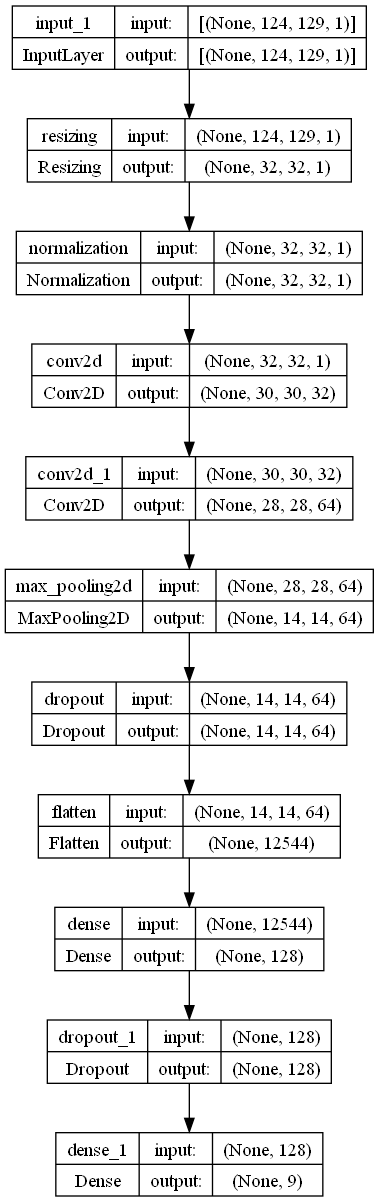

In [37]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Carregar o modelo
modelo = tf.keras.models.load_model('../models')

# Gerar o gráfico da arquitetura do modelo
plot_model(modelo, to_file='modelo_grafico.png', show_shapes=True)


# Usando uma matriz de confusão para verificar quão bem o modelo classificou cada um dos comandos no conjunto de Teste
Uma matriz de confusão, também conhecida como matriz de erro, é uma tabela usada para descrever o desempenho de um modelo de classificação em um conjunto de dados de teste, onde as classes reais são conhecidas. Essa matriz permite visualizar de forma clara e organizada as previsões feitas pelo modelo em relação aos rótulos verdadeiros.

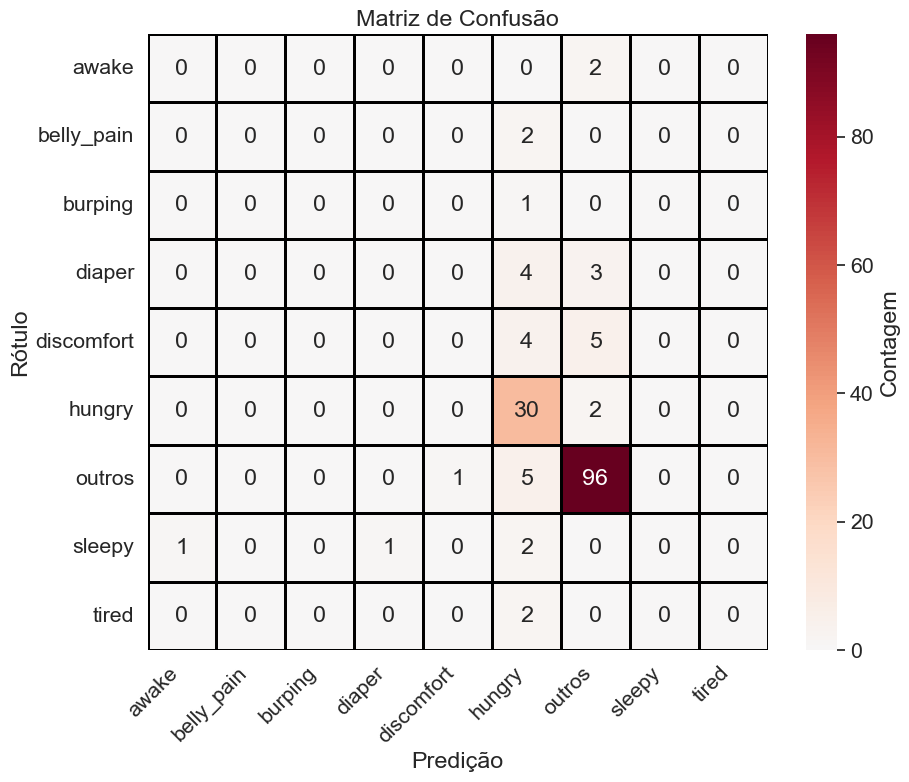

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(y_test_labels, y_pred)

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # Aumentar o tamanho da fonte
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='RdBu_r', center=0, linewidths=1, linecolor='black', 
                 xticklabels=commands, yticklabels=commands)
ax.set_xlabel('Predição')
ax.set_ylabel('Rótulo')
ax.set_title('Matriz de Confusão')

# Ajustar rotação e alinhamento dos rótulos dos eixos x e y
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adicionar título à barra de cores
cbar = ax.collections[0].colorbar
cbar.set_label('Contagem')

plt.show()


# Árvore de Decisão

Visualização gráfica da árvore de decisão

In [ ]:
X_train = model.predict(x_val_ds)
Y_train = y_test_labels

2/2 [==============================] - 0s 16ms/step


In [ ]:
from sklearn.tree import DecisionTreeClassifier
arvore_tipo_choro = DecisionTreeClassifier(max_depth=3, random_state=31)
arvore_tipo_choro.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=31)

In [ ]:
arvore_tipo_choro.feature_importances_

array([0.301387  , 0.        , 0.25034349, 0.26425817, 0.18401135])

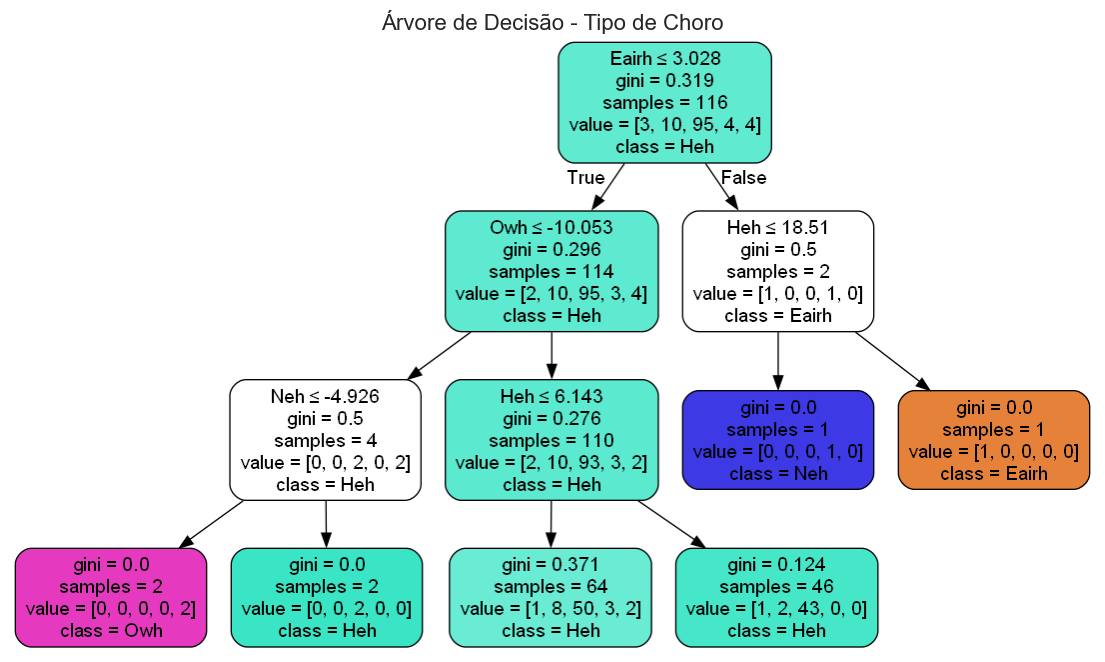

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

classes_nomes = ['Eairh', 'Eh', 'Heh', 'Neh', 'Owh']
# classes_nomes = ['awake', 'diaper', 'hungry', 'sleepy', 'uncomfortable']

dot_data = export_graphviz(arvore_tipo_choro,
                           feature_names=classes_nomes,
                           class_names=classes_nomes,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           out_file=None)

graph = graphviz.Source(dot_data)
graph.format = 'png'  # Define o formato da saída (SVG, PNG, PDF, etc.)
graph.render('decision_tree')  # Renderiza a árvore em um arquivo "decision_tree.png"

plt.figure(figsize=(14, 10))  # Ajustar tamanho da figura
plt.title('Árvore de Decisão - Tipo de Choro', fontsize=16)

# Exibe a imagem renderizada da árvore
img = plt.imread('decision_tree.png')
plt.imshow(img)
plt.axis('off')  # Desativa os eixos

plt.show()
